<a href="https://colab.research.google.com/github/sunilkumar1762/CHURN-SEGMENTATION-AND-CHURN-PREDICTIVE/blob/main/Project_1_Customer_Segmentation_for_Targeted_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Customer Segmentation for Targeted Marketing


PROBLEM STATEMENT::
To perform customer segmentation based on purchasing behavior and demographics to identify
distinct customer groups for targeted marketing strategies.

### #importing libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway, chi2_contingency
import warnings
warnings.filterwarnings("ignore")


LOAD THE DATASET


In [109]:
df = pd.read_csv('/content/customer.csv')
df


,CustomerID,Age,Gender,AnnualIncome,PurchaseHistory
0,1,24,Male,45000,30
1,2,52,Female,85000,45
2,3,35,Female,60000,24
3,4,46,Male,75000,50
4,5,29,Female,32000,12
5,6,41,Male,65000,36
6,7,38,Female,72000,22
7,8,30,Male,48000,18
8,9,27,Female,54000,29
9,10,50,Male,83000,41


# DATA EXPLORATION



In [148]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,PurchaseHistory,Total_Spend,Avg_Transaction_Value,Purchase_Frequency,label
0,1,24,0,45000,30,30,30.0,1,2
1,2,52,1,85000,45,45,45.0,1,3
2,3,35,1,60000,24,24,24.0,1,0
3,4,46,0,75000,50,50,50.0,1,4
4,5,29,1,32000,12,12,12.0,1,1


In [110]:
df.describe()

,CustomerID,Age,AnnualIncome,PurchaseHistory
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,37.200000,61900.000000,30.700000
std,3.02765,9.874771,17323.394587,12.229745
min,1.00000,24.000000,32000.000000,12.000000
25%,3.25000,29.250000,49500.000000,22.500000
50%,5.50000,36.500000,62500.000000,29.500000
75%,7.75000,44.750000,74250.000000,39.750000
max,10.00000,52.000000,85000.000000,50.000000


In [111]:
df.dtypes

CustomerID          int64
Age                 int64
Gender             object
AnnualIncome        int64
PurchaseHistory     int64
dtype: object

# DATA CLEANING
### #Checking the Missing Values

In [112]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
AnnualIncome       0
PurchaseHistory    0
dtype: int64

#Outlier detection

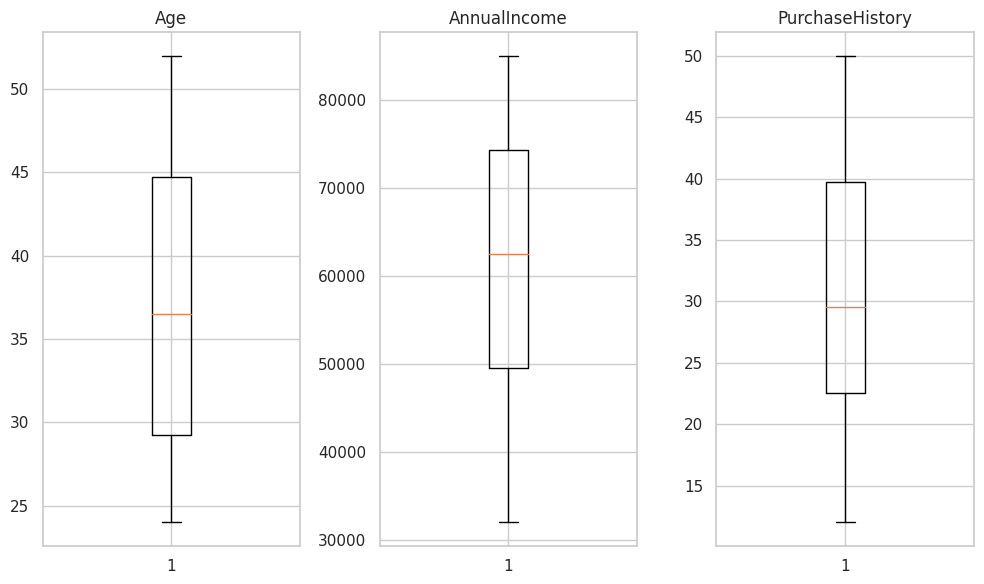

In [113]:
# Create boxplots
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.boxplot(df["Age"])
plt.title("Age")

plt.subplot(1, 3, 2)
plt.boxplot(df["AnnualIncome"])
plt.title("AnnualIncome")

plt.subplot(1, 3, 3)
plt.boxplot(df["PurchaseHistory"])
plt.title("PurchaseHistory")

plt.tight_layout()
plt.show()



#FEATURE ENGINEERING
#creating new features
 [ Total Spend, Avg Transactional Value , Purchase Frequency

In [114]:
df['Total_Spend'] = df[['PurchaseHistory']].sum(axis=1)
df['Avg_Transaction_Value'] = df[['PurchaseHistory']].mean(axis=1)
df['Purchase_Frequency'] = df.filter(like='Purchase').count(axis=1)
df


,CustomerID,Age,Gender,AnnualIncome,PurchaseHistory,Total_Spend,Avg_Transaction_Value,Purchase_Frequency
0,1,24,Male,45000,30,30,30.0,1
1,2,52,Female,85000,45,45,45.0,1
2,3,35,Female,60000,24,24,24.0,1
3,4,46,Male,75000,50,50,50.0,1
4,5,29,Female,32000,12,12,12.0,1
5,6,41,Male,65000,36,36,36.0,1
6,7,38,Female,72000,22,22,22.0,1
7,8,30,Male,48000,18,18,18.0,1
8,9,27,Female,54000,29,29,29.0,1
9,10,50,Male,83000,41,41,41.0,1



#  EDA
  Correlation Estimate


In [115]:

# Calculate the correlation matrix
corr_matrix = df.corr()
df.corr()


,CustomerID,Age,AnnualIncome,PurchaseHistory,Total_Spend,Avg_Transaction_Value,Purchase_Frequency
CustomerID,1.000000,0.040881,0.094271,-0.154540,-0.154540,-0.154540,NaN
Age,0.040881,1.000000,0.909468,0.747635,0.747635,0.747635,NaN
AnnualIncome,0.094271,0.909468,1.000000,0.788096,0.788096,0.788096,NaN
PurchaseHistory,-0.154540,0.747635,0.788096,1.000000,1.000000,1.000000,NaN
Total_Spend,-0.154540,0.747635,0.788096,1.000000,1.000000,1.000000,NaN
Avg_Transaction_Value,-0.154540,0.747635,0.788096,1.000000,1.000000,1.000000,NaN
Purchase_Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualization of Correlation

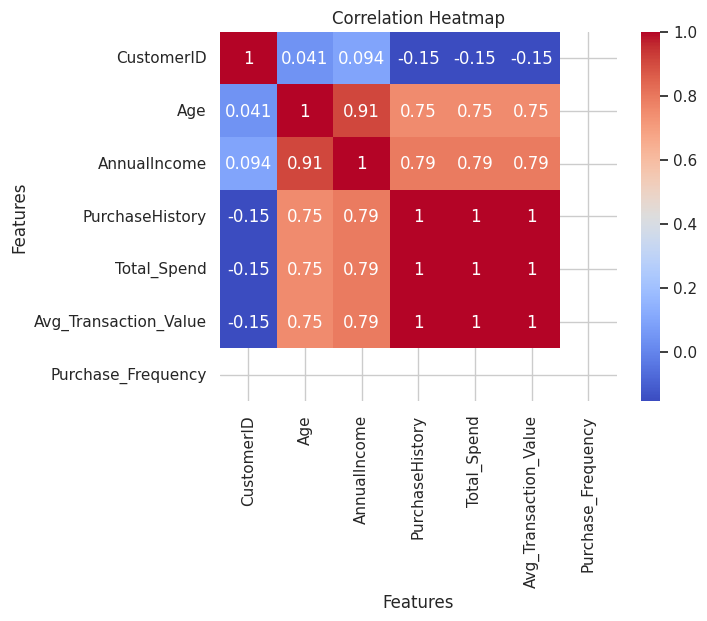

In [116]:
# Create a heatmap with annotations and colormap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Adjust colormap as needed

# Customize labels and title (optional)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')

plt.show()


DISTRIBUTION ANALYSIS

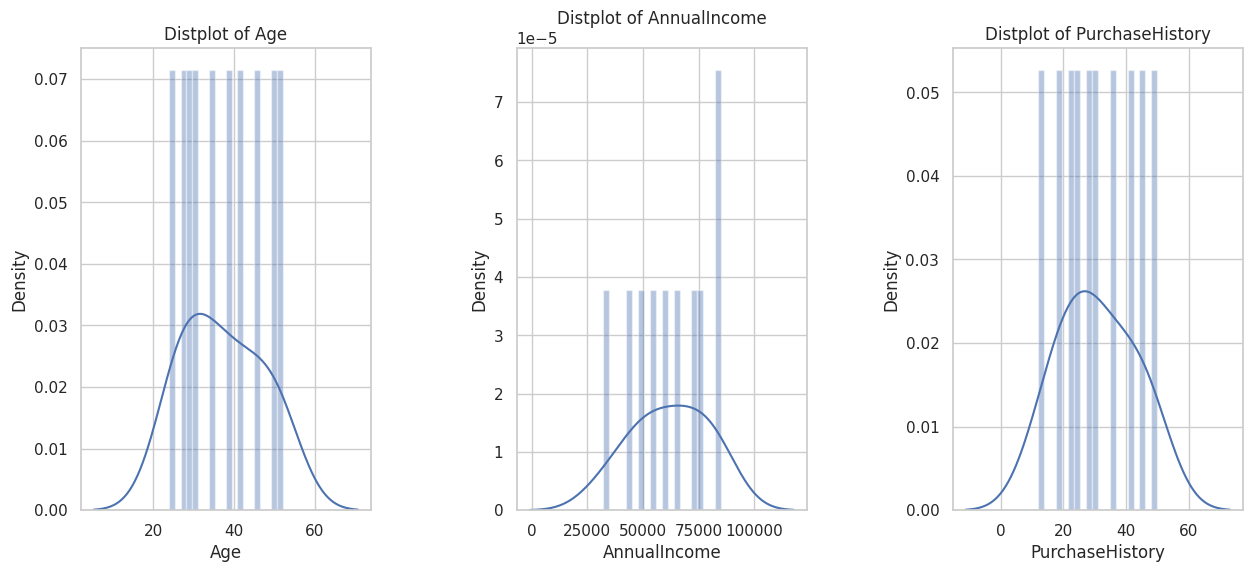

In [117]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age','AnnualIncome','PurchaseHistory']:
    n+=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Text(0, 0.5, 'Count')

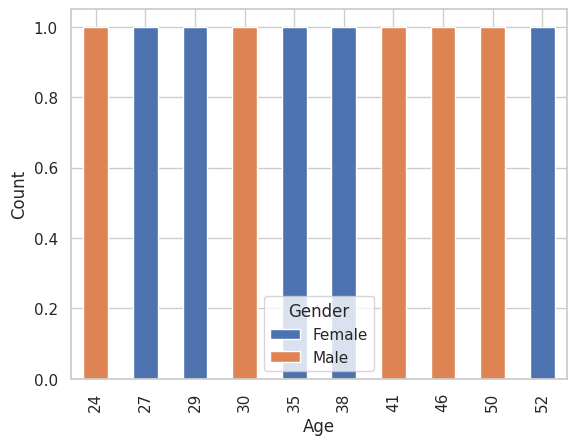

In [118]:
df.groupby(['Age', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Count')

<Axes: ylabel='Total_Spend'>

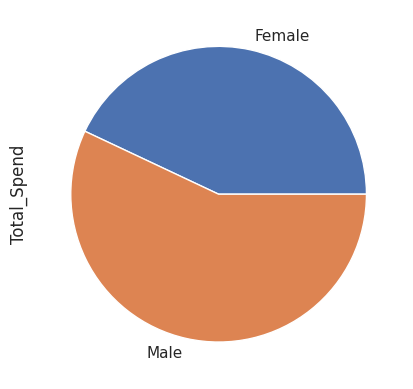

In [119]:
# Total Spending by Gender
df.groupby('Gender')['Total_Spend'].sum().plot(kind='pie')

<Axes: xlabel='Age', ylabel='Total_Spend'>

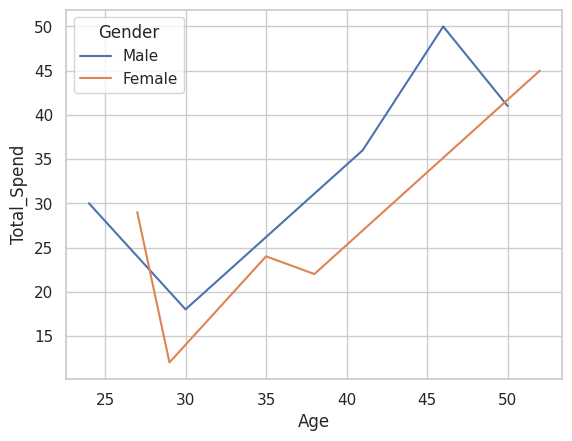

In [120]:
# Total Spend vs Age
sns.lineplot(x = 'Age', y = 'Total_Spend', hue = 'Gender', data = df)

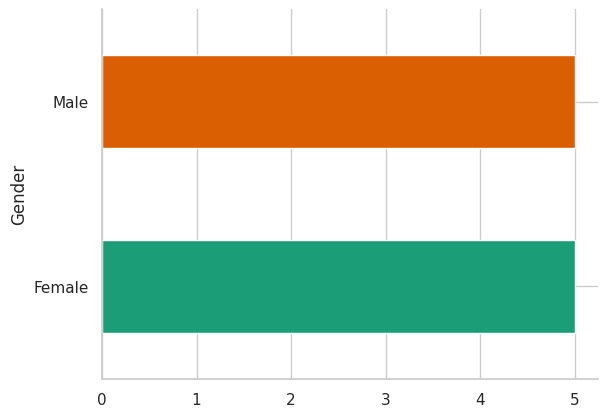

In [121]:
#  Gender
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

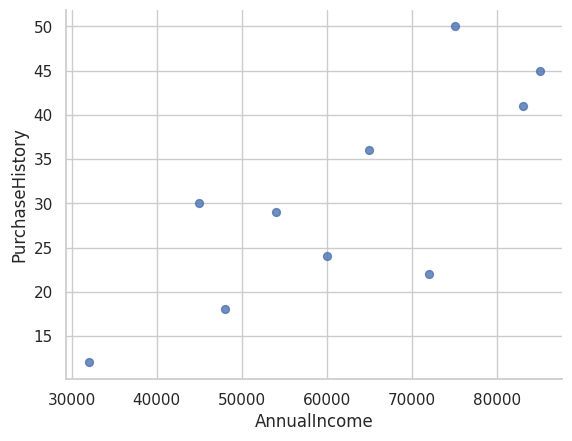

In [122]:
# AnnualIncome vs PurchaseHistory
df.plot(kind='scatter', x='AnnualIncome', y='PurchaseHistory', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

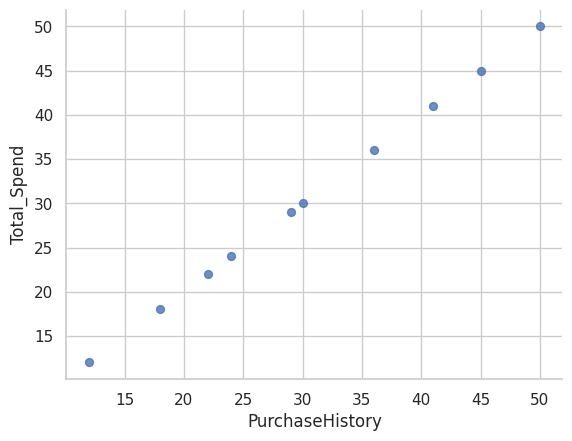

In [123]:
#  PurchaseHistory vs Total_Spend
df.plot(kind='scatter', x='PurchaseHistory', y='Total_Spend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0, 0.5, 'AnnualIncome')

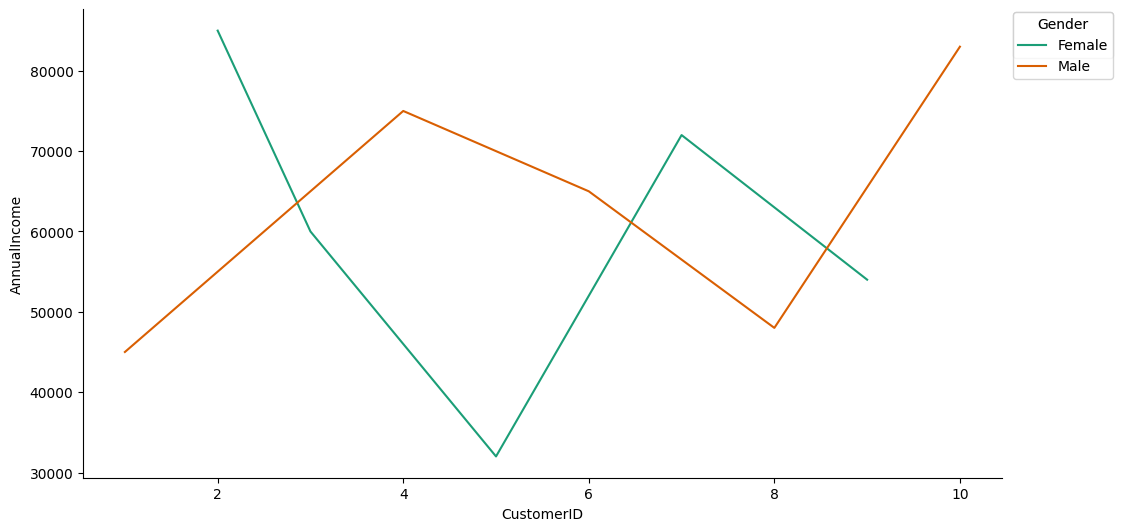

In [20]:
#  CustomerID vs AnnualIncome
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['AnnualIncome']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
plt.ylabel('AnnualIncome')

Text(0, 0.5, 'PurchaseHistory')

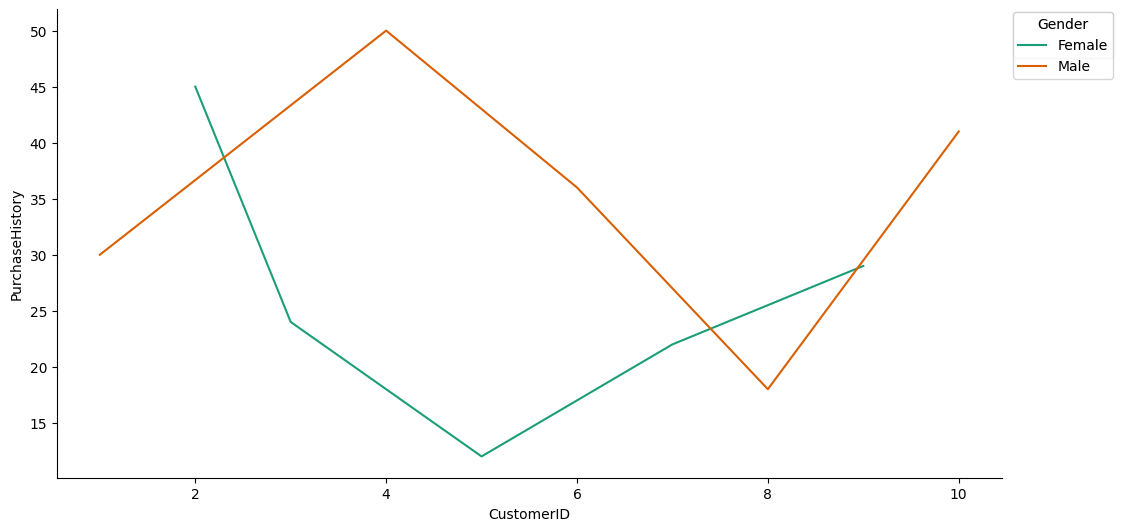

In [21]:
# CustomerID vs PurchaseHistory

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['PurchaseHistory']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
plt.ylabel('PurchaseHistory')

Text(0, 0.5, 'Total_Spend')

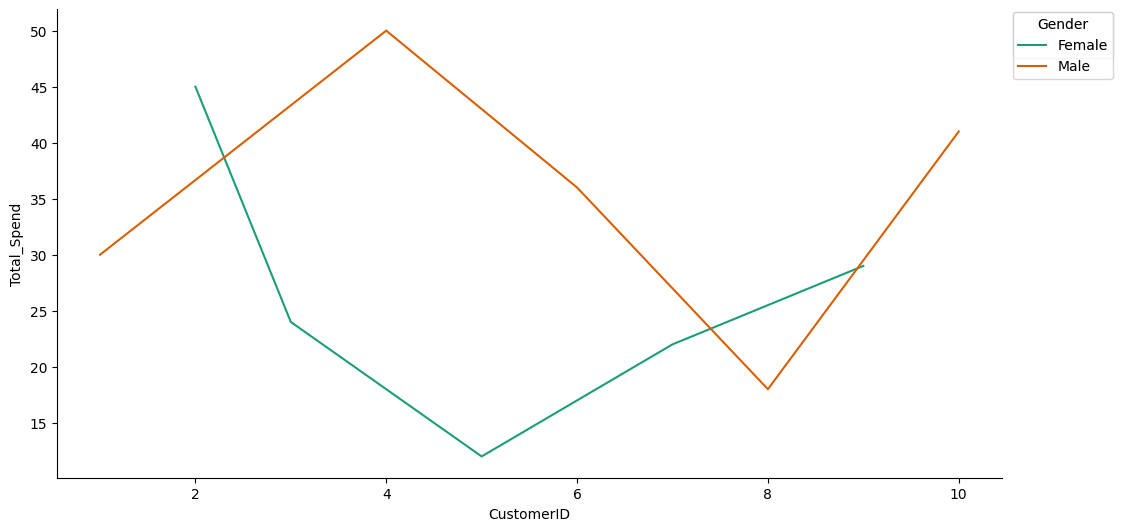

In [22]:
#  CustomerID vs Total_Spend
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Total_Spend']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Total_Spend')

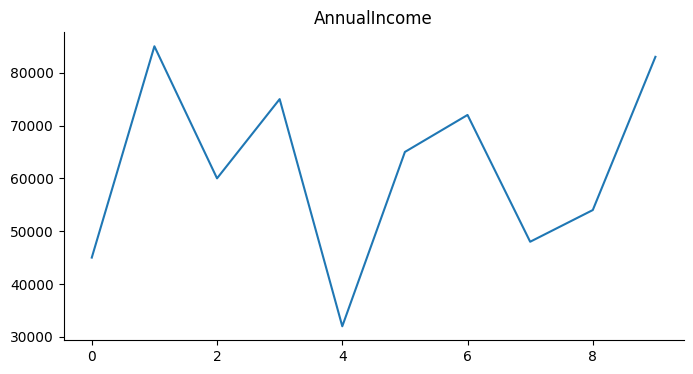

In [23]:
#  AnnualIncome
df['AnnualIncome'].plot(kind='line', figsize=(8, 4), title='AnnualIncome')
plt.gca().spines[['top', 'right']].set_visible(False)

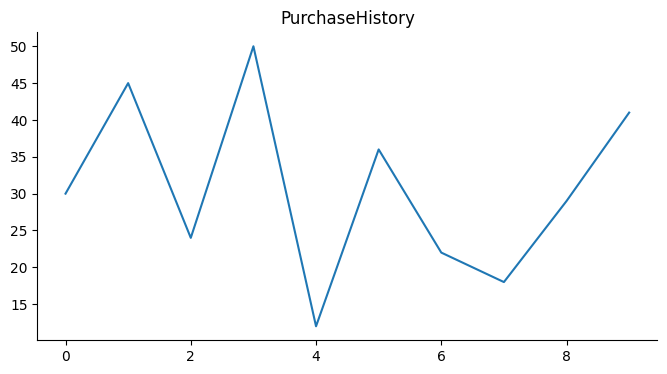

In [24]:
#  PurchaseHistory
df['PurchaseHistory'].plot(kind='line', figsize=(8, 4), title='PurchaseHistory')
plt.gca().spines[['top', 'right']].set_visible(False)

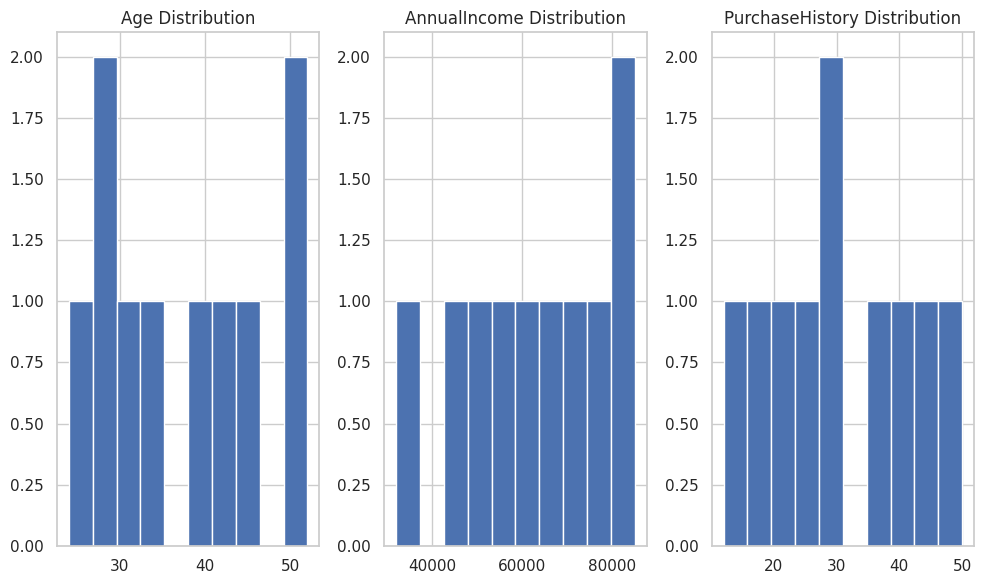

In [107]:
# Create distribution plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(df["Age"])
plt.title("Age Distribution")

plt.subplot(1, 3, 2)
plt.hist(df["AnnualIncome"])
plt.title("AnnualIncome Distribution")

plt.subplot(1, 3, 3)
plt.hist(df["PurchaseHistory"])
plt.title("PurchaseHistory Distribution")

plt.tight_layout()
plt.show()

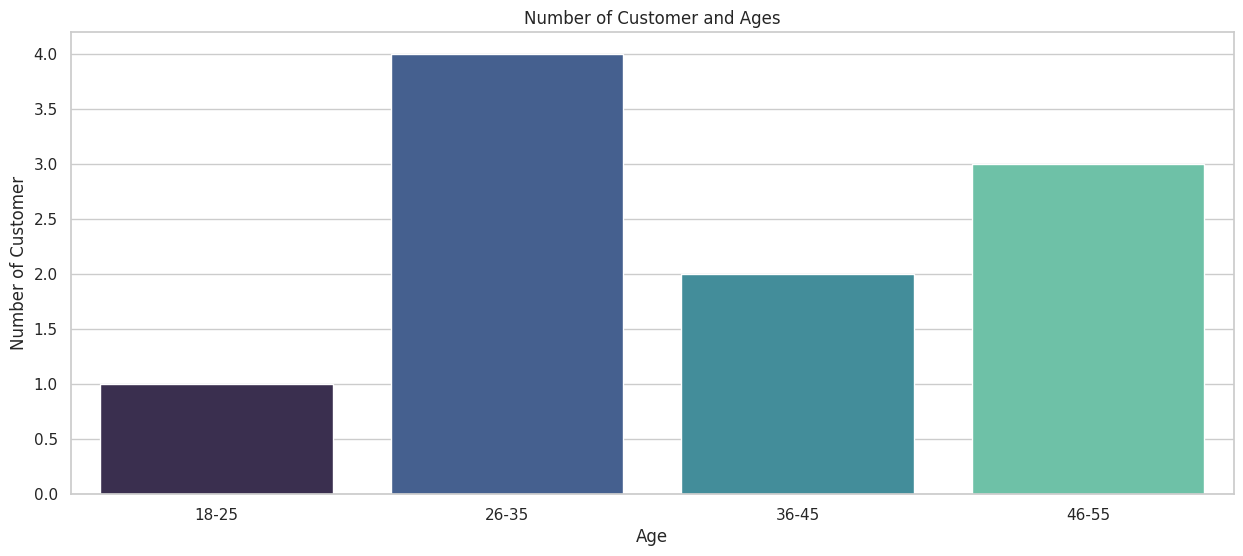

In [149]:
#Number of Customers and Ages
age_18_25 = df.Age[(df.Age >= 18) & (df.Age<=25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age<=35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age<=45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age<=55)]
Agex = ["18-25", "26-35", "36-45", "46-55"]
Agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=Agex, y=Agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

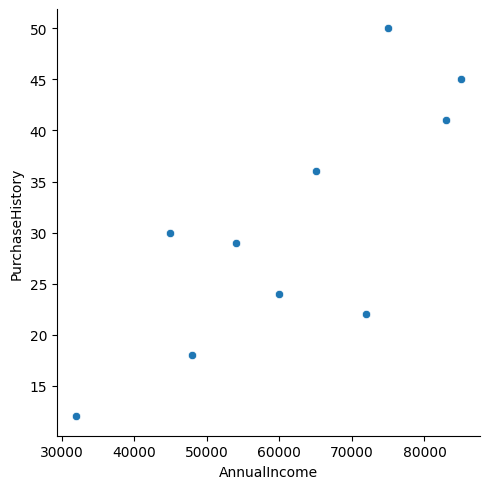

In [27]:
#relationship between Annual Income and PurchaseHistory
sns.relplot(x="AnnualIncome", y="PurchaseHistory", data = df)

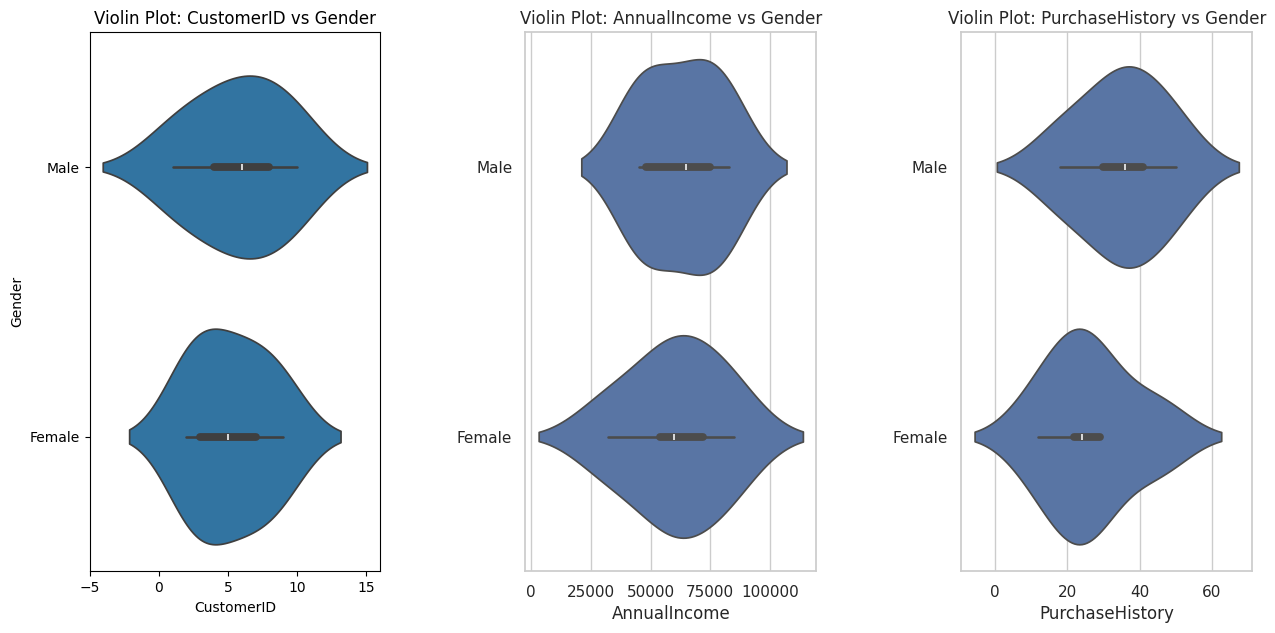

In [28]:
#Violin Plots for CustomerID VS Gender, Annual Income vs Gender, Gender vs Purchase History.
for cols in ['Gender vs CustomerID', 'Gender vs AnnualIncome', 'Gender vs PurchaseHistory']:
    plt.figure(1, figsize=(15, 7))
    n = 0
features = ['CustomerID', 'AnnualIncome', 'PurchaseHistory']  # Assuming these are your feature column names
for col in features:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=col, y='Gender', data=df)
    plt.ylabel('Gender' if n == 1 else ' ')
    plt.title(f'Violin Plot: {col} vs Gender')

plt.show()


# Customer Segmentation with Machine Learning

 USING K MEANS CLUSTERING

The Elbow criterion is a widely used method to determine the optimal number of clusters (k) in K-Means clustering. It involves plotting the
number of clusters against the WCSS within the clusters

WCSS (Within-Cluster Sum of Squares): This specifically focuses on the squared distances within each cluster, measuring how spread out the data points are within their assigned clusters.
Therefore, it's technically more accurate to utilize the WCSS when applying the Elbow Criterion for K-Means clustering optimization.

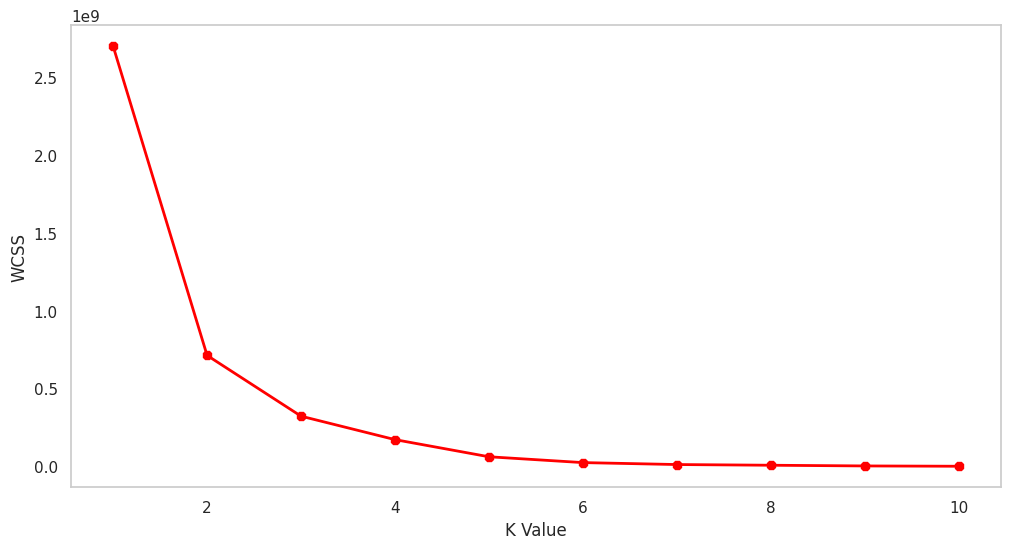

In [124]:
X1 = df.loc[:, ["Age","AnnualIncome"]].values
from sklearn.cluster import KMeans
WCSS= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),WCSS, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [125]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[1 0 3 0 2 3 3 1 1 0]


In [126]:
print(kmeans.cluster_centers_)

[[4.93333333e+01 8.10000000e+04]
 [2.70000000e+01 4.90000000e+04]
 [2.90000000e+01 3.20000000e+04]
 [3.80000000e+01 6.56666667e+04]]


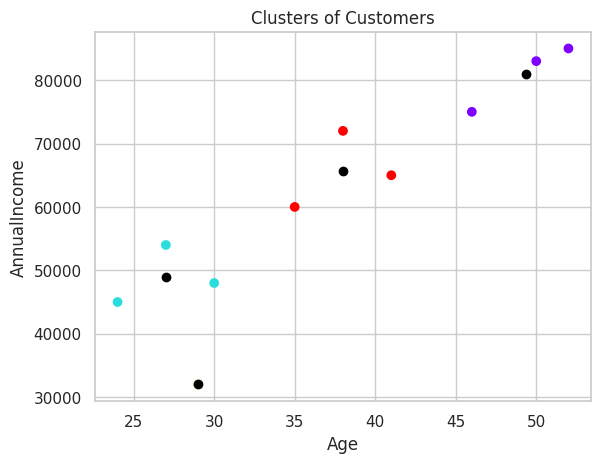

In [127]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('AnnualIncome')
plt.show()

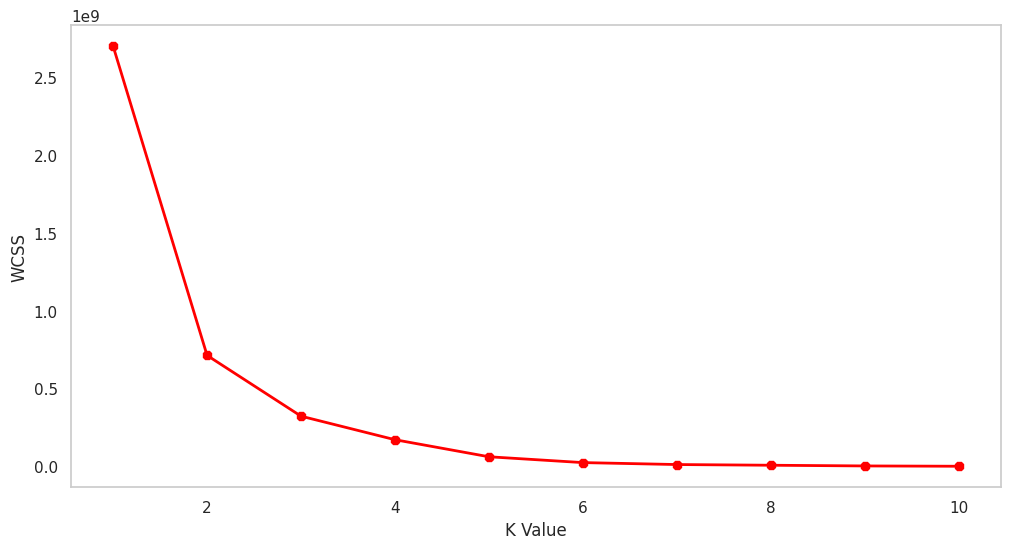

In [140]:
X2 = df.loc[:, ["AnnualIncome","PurchaseHistory"]].values
from sklearn.cluster import KMeans
WCSS= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),WCSS, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [141]:
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(X2)
print(label)

[0 1 0 1 0 1 1 0 0 1]


In [142]:
print(kmeans.cluster_centers_)

[[4.78e+04 2.26e+01]
 [7.60e+04 3.88e+01]]


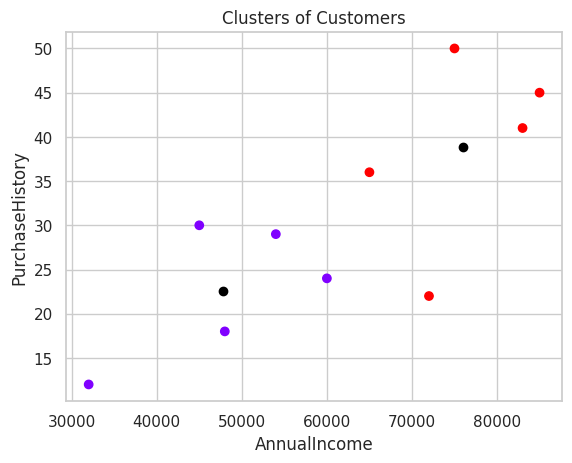

In [143]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('AnnualIncome')
plt.ylabel('PurchaseHistory')
plt.show()

In [132]:
# Convert the 'Gender' column to numeric values
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

# Reassign X3
X3 = df.iloc[:, 1:]

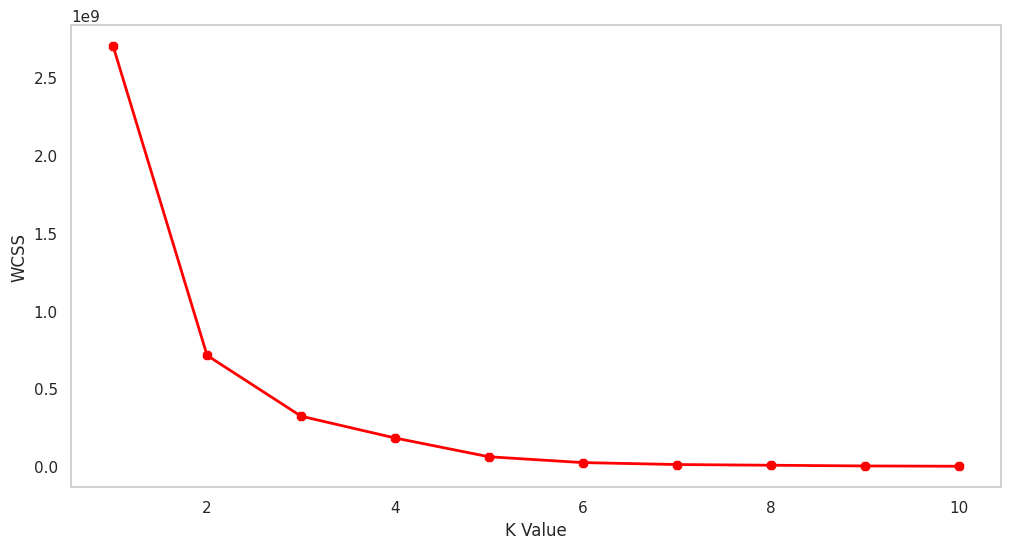

In [133]:
X3=df.iloc[:,1:]
WCSS=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),WCSS, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [144]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X2)
print(label)

[1 0 2 0 1 2 0 1 2 0]


In [138]:
print(kmeans.cluster_centers_)

[[4.78e+04 2.26e+01]
 [7.60e+04 3.88e+01]]


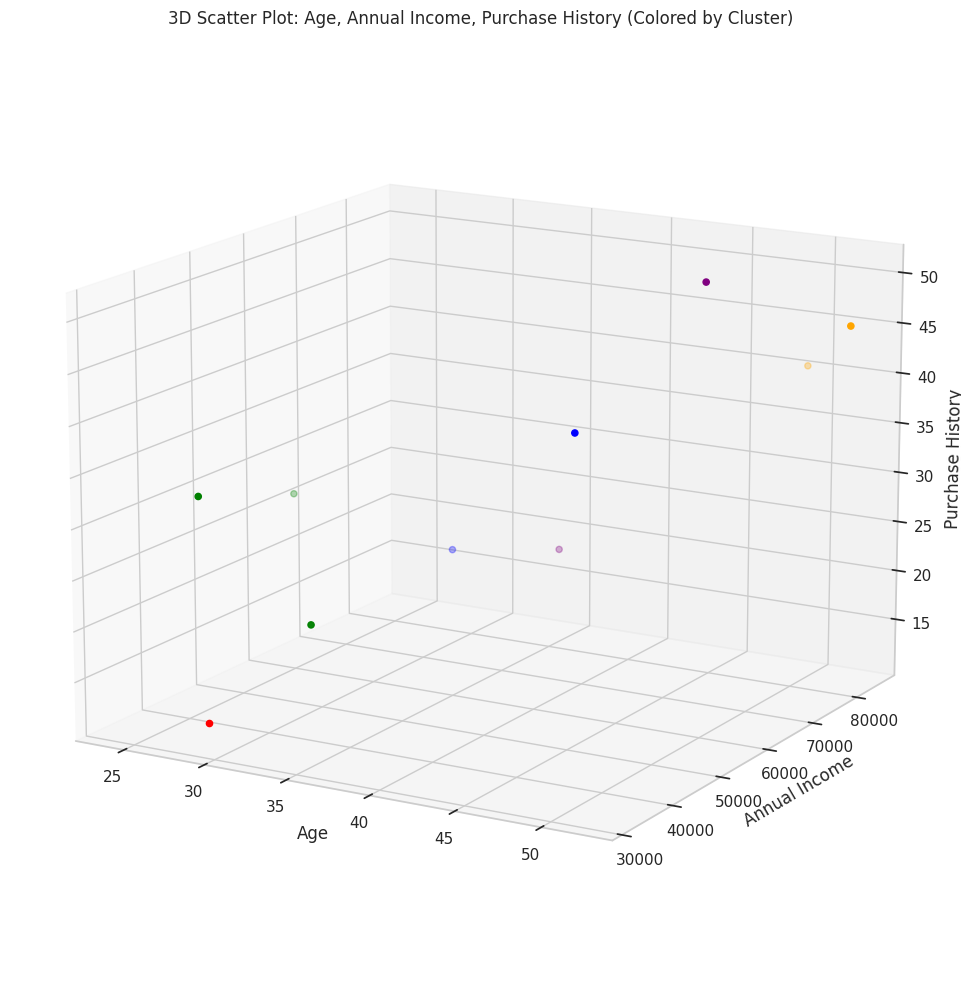

In [154]:
from mpl_toolkits.mplot3d import Axes3D

# Assign cluster labels to the DataFrame
df["label"] = clusters

# Create a 3D figure and axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plots for different labels using color-coding
colors = ['blue', 'red', 'green', 'orange', 'purple']
for label in df['label'].unique():
    ax.scatter(df.Age[df.label == label], df["AnnualIncome"][df.label == label], df["PurchaseHistory"][df.label == label], c=colors[label])

# Add labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Purchase History")
ax.set_title("3D Scatter Plot: Age, Annual Income, Purchase History (Colored by Cluster)")

ax.view_init(elev=15, azim=-60)  # Customize the viewing angle (elevation and azimuth)
plt.tight_layout()  # Adjust spacing between plot elements

plt.show()


# Calculating the silhouette score

In [146]:

# Assign cluster labels to the DataFrame
df["label"] = clusters

# Calculate the silhouette score
silhouette_score_value = silhouette_score(X3, df["label"])

print("Silhouette Score:", silhouette_score_value)


Silhouette Score: 0.5269321256372427


## Statistical Analysis
### Anova Model for Numerical Features

In [155]:
numerical_columns = ['AnnualIncome', 'PurchaseHistory']
categorical_columns = ['Gender']

# Perform ANOVA for numerical features
for col in numerical_columns:
    print(f"\nANOVA for {col} across segments:")
    f_statistic, p_value = f_oneway(*[df[col][df['AnnualIncome']==seg] for seg in df['PurchaseHistory'].unique()])
    print(f"F-statistic: {f_statistic:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:  # Significance level (adjust as needed)
        print(f"There is a statistically significant difference in {col} across segments (p < 0.05).")
    else:
        print(f"There is no statistically significant difference in {col} across segments (p >= 0.05).")



ANOVA for AnnualIncome across segments:
F-statistic: nan, p-value: nan
There is no statistically significant difference in AnnualIncome across segments (p >= 0.05).

ANOVA for PurchaseHistory across segments:
F-statistic: nan, p-value: nan
There is no statistically significant difference in PurchaseHistory across segments (p >= 0.05).


## Chi- Square Test for Categorical features

In [97]:
# Perform Chi-Square test for categorical features
for col in categorical_columns:
    print(f"\nChi-Square test for {col} across segments:")
    contingency_table = pd.crosstab(df['AnnualIncome'], df[col])  # Create contingency table
    chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table.values)  # Perform test
    print(f"Chi-Square statistic: {chi2_statistic:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:  # Significance level (adjust as needed)
        print(f"There is a statistically significant difference in the distribution of {col} across segments (p < 0.05).")
    else:
        print(f"There is no statistically significant difference in the distribution of {col} across segments (p >= 0.05).")


Chi-Square test for Gender across segments:
Chi-Square statistic: 10.0000, p-value: 0.3505
There is no statistically significant difference in the distribution of Gender across segments (p >= 0.05).
